In [1]:
# 타이타닉 데이터 불러오기
import seaborn as sns

# seaborn의 연습용 데이터는 DataFrame 구조 
data = sns.load_dataset("titanic")
data.head()
# 컬럼의 class 는 Pclass와 같다. alive = survived

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# 전처리 작업 수행
# 중복열 제거
# columns를 제거하게 되면 축 방향을 제시해 주면 된다.
prep_data = data.drop(columns=["alive", "who", "adult_male", "class", "embark_town"])

# 결측값이 많은 열 제거 
prep_data.drop("deck", axis=1, inplace=True)
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [4]:
# 결측값 제거후 인덱스 재정렬

prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 45.3+ KB


In [5]:
# # dropna()에 대한 추가적인 예제
# import pandas as pd
# import numpy as np
# # np.random.randn(5,4) => 5행 4열 난수를 만듦 
# df = pd.DataFrame(np.random.randn(5,4),columns = ['C1', 'C2',' C3', 'C4'])
# df.loc[[0,1], 'C1'] = None # 0행 C1에 nan값을 집어넣음
# df.loc[2,'C2'] = np.nan
# df

In [6]:
# df_dop_row = df.dropna(axis = 1)
# df_dop_row

In [7]:
# df_dop_row_thresh = df.dropna(thresh = 4, axis = 1) # default = axis 1
# df_dop_row_thresh # 삭제하는 기능 dropna와 같음

In [8]:
from sklearn.preprocessing import LabelEncoder
# male은 0, femail은 1로 변함
le = LabelEncoder()
prep_data["sex"] = le.fit_transform(prep_data["sex"])
prep_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,False
708,0,2,1,27.0,0,0,13.000,S,True
709,1,1,0,19.0,0,0,30.000,S,True
710,1,1,1,26.0,0,0,30.000,C,True
711,0,3,1,32.0,0,0,7.750,Q,True


In [9]:
le.classes_ # 라벨인코딩 순서가 나옴

array(['female', 'male'], dtype=object)

In [10]:
# embarked 열은 문자열이므로 숫자 자료형으로 변함
from sklearn.preprocessing import OneHotEncoder
embarked_unique = prep_data.embarked.unique()  
print("embarked열의 고유한 값:\n", embarked_unique)
ohe = OneHotEncoder()

# fancy indexing은 DataFrame을 반환 
# 리스트로 주면 데이터프레임으로 반환
embarked_df = prep_data[["embarked"]]

# OneHotExcodersms DataFrame만 입력 가능
ohe.fit(embarked_df)
embarked_ohe = ohe.transform(embarked_df)
embarked_ohe

embarked열의 고유한 값:
 ['S' 'C' 'Q']


<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [11]:
# OneHotEncoding 결과를 numpy 배열로 변홖핚 후, 다시 DataFrame으로 변홖핚다.
import pandas as pd
embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique) # toarray() => 희소행렬 구조는 2차원 구조로 바뀐다.
embarked_df.sample(5)


,S,C,Q
252,0.0,0.0,1.0
330,0.0,1.0,0.0
20,0.0,0.0,1.0
359,1.0,0.0,0.0
354,0.0,0.0,1.0


In [12]:
# 인코딩한 DataFrame을 학습데이터 DataFrame에 합쳐주고 기존 embarked 열은 삭제한다.
# 기존 데이터프레임에 연결하는 작업. 기존  embarked는 필요가 없으므로
prep_data = pd.concat([prep_data, embarked_df], axis=1)
prep_data = prep_data.drop("embarked", axis=1)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,True,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,True,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,True,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,True,1.0,0.0,0.0


In [13]:
le = LabelEncoder()
prep_data['alone'] = le.fit_transform(prep_data['alone'])
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,0,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,1,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,1,1.0,0.0,0.0


In [14]:
# 성능 검증을 위해서 트레인셋과 테스트셋으로 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], prep_data.iloc[:, 0], random_state=42)


#### class Decision TreeClassifier의 Parameters
- criterion : "gini"와 "entropy" 총 두 가지가 있으며, 기본 값은 gini이다.
    - gini”는 “entropy”보다 연산속도는 빠르지만 한쪽으로 편향된 결과를 낼 수 있다.
    - entropy”는 “gini”에 비해 조금 더 균형 잡힌 model을 만들 수 있다고 한다.
- max_depth : Decision Tree의 최대 깊이 제한. default=None. 클수록 정확하게 (과대적합) 작을수록 가지치기 (과대적합 방지)
- min_samples_split : 노드에서 가지를 분리할 때 필요한 최소 sample 개수에 대한 제한.default = 2. 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
- min_samples_leaf : 한 노드에서 가지고 있어야 할 최소 sample 개수에 대한 제한.default = 1. 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
    - int일 경우, 주어진 값을 그대로 사용.
    - float일 경우, 0에서 1사이의 값을 줄 수 있으며 ceil(전체 데이터 수*min_samples_leaf)의 값을 사용
- max_features :  최상의 분할을 찾기 위한 feature의 수. default=None
    - int일 경우, 주어진 값을 그대로 사용한다.
    - float일 경우, int(max_features * 총 변수 개수)를 사용한다.
    - None일 경우, 총 변수 개수를 사용한다.
- max_leaf_nodes : int or None, optional (default=None). 최대 몇개 잎 노드가 만들어 질때 까지 split(하위 (잎) 노드로 분리) 할 것이냐를 결정한다. 클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.
- min_impurity_decrease : 분할로 얻어질 분순도 감소량 지정
- min_weight_fraction_leaf: min_samples_leaf와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [15]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier
#하이퍼 파라미터, 가지치기
model = DecisionTreeClassifier(max_depth=2) # max_depth : 트리의 최대 깊이 (이거 뺴고 모두 디폴트 값 사용함)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [16]:
# 모델 예측 및 평가
score = model.score(X_test, y_test)
print("정확도 :", score)

정확도 : 0.7584269662921348


-----------------------------------------------------------------------------------------------
###  DecisionTree 모델이 학습하는 동안 중요한 역할을 한 피처를 확인할 수 있다. 유용하지 않은 피처를 제거하여 차원의 저주를 벗어나는 feature selection 기법에 활용할 수 있다.

피처 중요도:
 [0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.         0.        ]


(-1.0, 10.0)

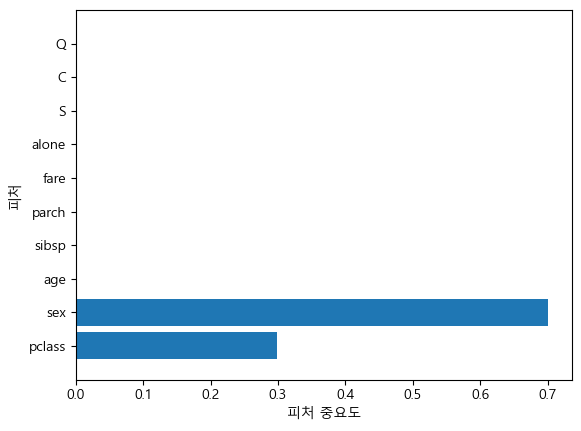

In [17]:
import numpy as np
import matplotlib.pyplot as plt
print("피처 중요도:\n", model.feature_importances_) # 어떤 항목이 중요하게 사용되었는지 알 수 있다.
plt.rcParams["font.family"] = 'Malgun Gothic'
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)

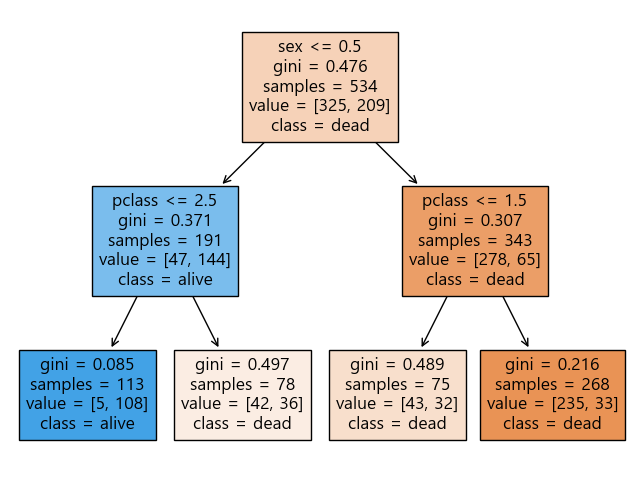

In [18]:
# 모델 그리기 : 의사결정나무를 시각화하는 기능을 자체적으로 지원한다
from sklearn.tree import plot_tree
label_val = {0: 'dead', 1: 'alive'}
plt.figure(figsize=(8,6))
plot_tree(model.fit(X_train, y_train), feature_names = X_train.columns , class_names = label_val, filled = True)
plt.show()

### 서울 지역 분류 실습 추가 예제

In [19]:
import pandas as pd
import numpy as np
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [20]:
# 서울의 대표적인 구 위치 데이터
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]




In [21]:
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [22]:
# 서울의 대표적인 동 위치 데이터
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]


In [23]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [24]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인

train_df.label.value_counts() #value_counts => 갯수를 구해줌
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [25]:
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [26]:
# 경도와 위도의 평균과 편차 확인
train_df.describe()
train_df.head()
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


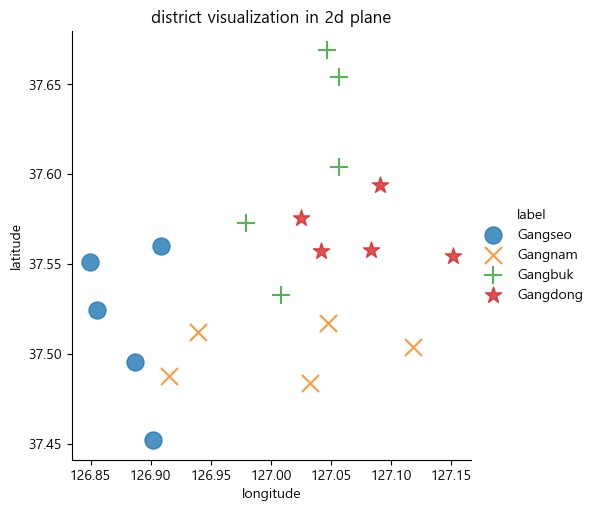

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x = 'longitude', y = 'latitude', data=train_df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=["o", "x", "+", "*"],
           hue="label")

plt.title('district visualization in 2d plane')
plt.show()

In [28]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace = True)


In [29]:
# 데이터 분리 작업
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]
X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]


In [30]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [31]:
def display_decision_surface(clf,X, y):
 # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
 x_min = X.longitude.min() - 0.01 # 경계선 앞 뒤를 설정
 x_max = X.longitude.max() + 0.01
 y_min = X.latitude.min() - 0.01
 y_max = X.latitude.max() + 0.01

# 파라미터 설정
 n_classes = len(le.classes_)
 plot_colors = "rywb"
 plot_step = 0.001
 xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
 np.arange(y_min, y_max, plot_step))

 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z.reshape(xx.shape)
 cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
# 학습 데이터를 차트에 표시 (산점도를 그리는 작업)
 for i, color in zip(range(n_classes), plot_colors):
     idx = np.where(y == i)
     plt.scatter(X.loc[idx].longitude, 
         X.loc[idx].latitude, 
         c=color, 
         label=le.classes_[i],
         cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    
    # 차트 제목
 plt.title("Decision surface of a decision tree",fontsize=16)

 # 차트 기호 설명
 plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

 # x축의 이름과 폰트 크기 설정
 plt.xlabel('longitude',fontsize=16)

 # y축의 이름과 폰트 크기 설정
 plt.ylabel('latitude',fontsize=16)


In [32]:
# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)


C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


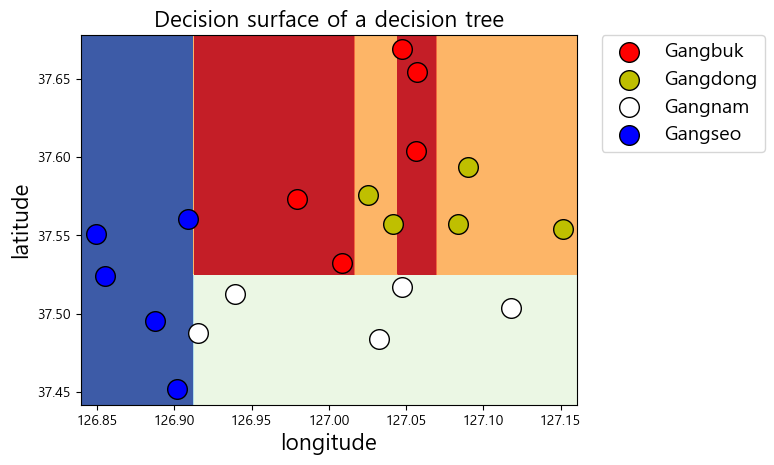

In [33]:
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


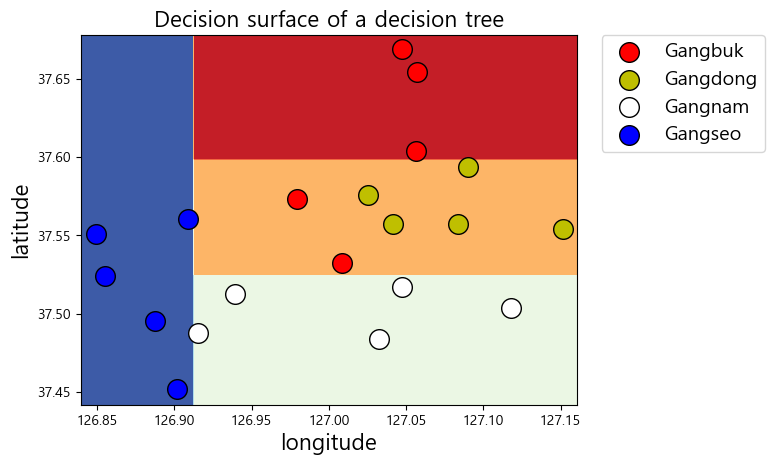

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=3,  
 min_samples_split=3,
 min_samples_leaf=3, 
random_state=5).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)


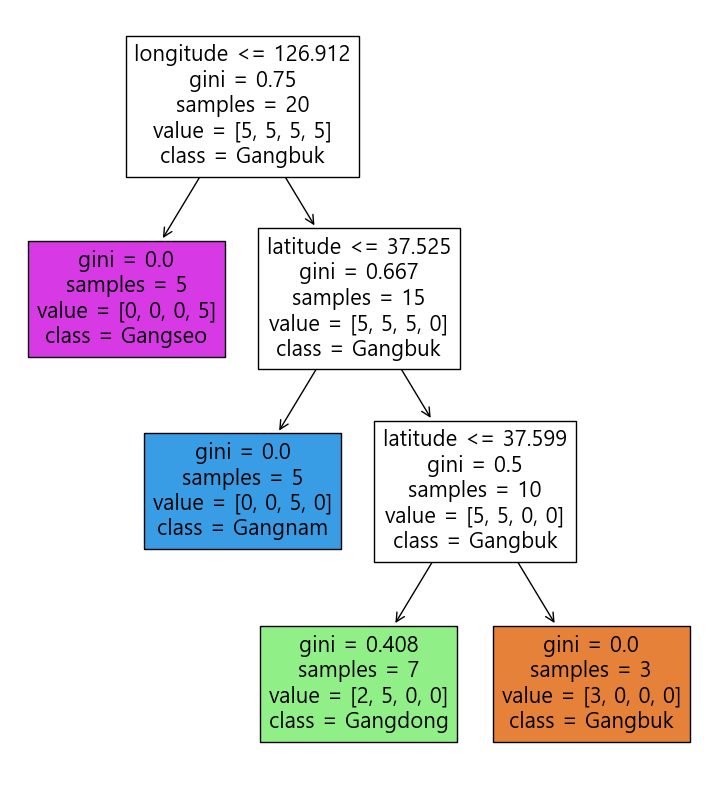

In [37]:
# 모델 그리기 : 의사결정나무를 시각화하는 기능을 자체적으로 지원핚다
from sklearn.tree import plot_tree
label_val = {0:'Gangbuk', 1: 'Gangdong', 2: 'Gangnam', 3:'Gangseo'}
plt.figure(figsize=(9,10))
plot_tree(clf.fit(X_train, y_encoded), feature_names = X_train.columns, class_names = label_val, filled = True)
plt.show()